#Read Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/IMDB_small_size.csv', delimiter=',')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
dataset.shape

(10000, 2)

#Resize Dataset

In [3]:
df_resize = dataset.iloc[:100]
df_resize.shape

(100, 2)

#Tokenization

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = df_resize['review'].astype(str)
df_class = df_resize['sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
  line = line.replace("<br />","")
  tokens = word_tokenize(line)
  list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
 list_tokens[1]

['A',
 'wonderful',
 'little',
 'production',
 '.',
 'The',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-BBC',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting',
 ',',
 'and',
 'sometimes',
 'discomforting',
 ',',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece',
 '.',
 'The',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'Michael',
 'Sheen',
 'not',
 'only',
 '``',
 'has',
 'got',
 'all',
 'the',
 'polari',
 "''",
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too',
 '!',
 'You',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 'Williams',
 "'",
 'diary',
 'entries',
 ',',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece',
 '.',
 'A',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 'master',
 "'s",
 'of',
 'comedy',
 'a

#Removing Stopwords and Lemmatization

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


df_text = df_resize['review'].astype(str)
df_class = df_resize['sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
lemmatizer = WordNetLemmatizer()

for line in lines:
  line = line.replace("<br />","")
  tokens = word_tokenize(line)
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  tokens = [word for word in tokens if not word in stopwords.words()]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
list_tokens_lemma[7]

['show',
 'amazing',
 'fresh',
 'innovative',
 'idea',
 'first',
 'aired',
 'first',
 'year',
 'brilliant',
 'thing',
 'dropped',
 'show',
 'really',
 'funny',
 'anymore',
 'continued',
 'decline',
 'complete',
 'waste',
 'time',
 'truly',
 'disgraceful',
 'far',
 'show',
 'fallen',
 'writing',
 'painfully',
 'bad',
 'performance',
 'almost',
 'bad',
 'mildly',
 'entertaining',
 'respite',
 'show',
 'probably',
 'would',
 'still',
 'air',
 'find',
 'hard',
 'believe',
 'creator',
 'original',
 'cast',
 'chose',
 'band',
 'hack',
 'followed',
 'recognize',
 'brilliance',
 'see',
 'fit',
 'replace',
 'mediocrity',
 'felt',
 'must',
 'give',
 'star',
 'respect',
 'original',
 'cast',
 'made',
 'show',
 'huge',
 'success',
 'show',
 'awful',
 'believe',
 'still',
 'air']

#Feature Extraction 

##TF-IDF

In [18]:
#Feature Extraction dari hasil lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer
new_doc = list()

for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [19]:
print(tfidf_vectorizer.get_feature_names())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['absolutely', 'accent', 'accepted', 'accurate', 'act', 'acting', 'action', 'actor', 'actress', 'actual', 'actually', 'adding', 'adventure', 'affair', 'affected', 'aftermath', 'air', 'alexandra', 'alive', 'almost', 'along', 'already', 'although', 'altogether', 'always', 'amazing', 'america', 'american', 'among', 'amount', 'anand', 'annoying', 'another', 'anyone', 'anything', 'apparently', 'appear', 'appears', 'approach', 'arff', 'army', 'around', 'art', 'aspect', 'atmosphere', 'atrocity', 'attack', 'attempt', 'attraction', 'audience', 'auer', 'authority', 'available', 'average', 'avoid', 'aware', 'away', 'awesome', 'awful', 'back', 'background', 'bad', 'banal', 'band', 'bank', 'bar', 'barbara', 'barely', 'barnes', 'barry', 'based', 'basically', 'battle', 'beautiful', 'become', 'becomes', 'began', 'begin', 'beginning', 'behind', 'bela', 'believable', 'believe', 'best', 'better', 'beyond', 'big', 'bigger', 'bill', 'bit', 'bizarre', 'black', 'blockbuster', 'blood', 'bluff', 'board', 'boll

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Creating model

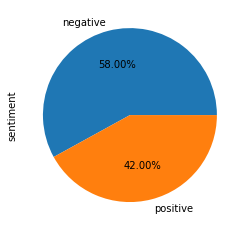

In [20]:
import matplotlib.pyplot as plt

data = df_resize['sentiment'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

##MLP + TF-IDF

Accuracy  0.5333333333333333
Precision  0.8
Recall  0.23529411764705882
Confusion matrix  [[12  1]
 [13  4]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


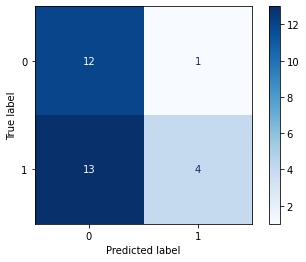

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


# define x and y
df_X = X_input_tfidf
df_y = df_resize['sentiment']

#Train test split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)


le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)


model=MLPClassifier(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()